## Template Matching

### What is our goal?

The goal, given a query image of Waldo and the puzzle image, is to find Waldo in in the puzzle image and highlight his location. Don't know who is Waldo and what the puzzle is? Don't worry, an example is shown below!

We require two images to build our Python script to perform template matching.

The first image is the Where’s Waldo puzzle that we are going to solve. The second image is a template of what Waldo looks like.

Let us begin by importing the necessary packages. (Note: % matplotlib inline lets you display your plot within this notebook)

In [2]:
# import the necessary packages
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt
% matplotlib inline

### Now let's take a look at Waldo! 

We are going to locate the image file of Waldo, read it, print it's dimensions and then display the image within the notebook.

Height of Template: 35 & Width of Template: 24


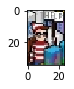

In [4]:
# Insert the location of the images
puzzle_address = 'Convention.jpg'
waldo_address = 'Wally.png'

# load the puzzle and waldo images
puzzle = cv2.imread(puzzle_address)
waldo = cv2.imread(waldo_address)
(waldoHeight, waldoWidth) = waldo.shape[:2]

# Display the dimensions and plot the image of Waldo
print("Height of Template: %d & Width of Template: %d" %(waldoHeight, waldoWidth))

# cv2 reads the image in BGR, we need to convert it to RGB values to see the plot. 
# What happens if you do not convert?
# Go ahead and try it out. Comment the next line and run the cell.
waldo_rgb = cv2.cvtColor(waldo,cv2.COLOR_RGB2BGR)

plt.figure(figsize=(1,1))
plt.imshow(waldo_rgb)

### Let's take a look at Waldo's convention.

We need to find Waldo within this picture. Can you find Waldo in the picture with your eyeballs?

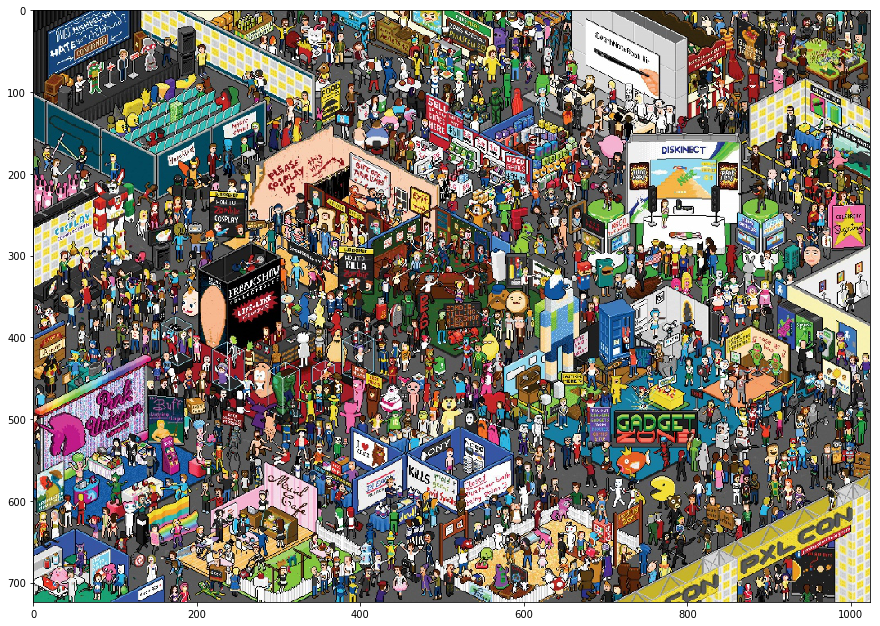

In [5]:
plt.figure(figsize=(15,15))
puzzle_rgb = cv2.cvtColor(puzzle,cv2.COLOR_RGB2BGR)

plt.imshow(puzzle_rgb)

We are now ready to perform our template matching. We accomplish our template matching in the next cell by using the cv2.matchTemplate function. This method requires three parameters. The first is our puzzle image, the image that contains what we are searching for. The second is our query image, waldo. This image is contained within the puzzle image and we are looking to pinpoint its location. Finally, the third argument is our template matching method. There are a variety of methods to perform template matching, but in this case we are using the correlation coefficient which is specified by the flag cv2.TM_CCOEFF. You can find the formulas and read about other template matching methods right here - https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/template_matching/template_matching.html

So what exactly is the cv2.matchTemplate function doing?

Essentially, this function takes a “sliding window” of our waldo query image and slides it across our puzzle image from left to right and top to bottom, one pixel at a time. Then, for each of these locations, we compute the correlation coefficient to determine how “good” or “bad” the match is. Regions with sufficiently high correlation can be considered “matches” for our waldo template.

In [6]:
# find the waldo in the puzzle
result = cv2.matchTemplate(puzzle, waldo, cv2.TM_CCOEFF)

Now what we need to do is use a call to cv2.minMaxLoc to find where our "good" matches are among the discovered matches above.

That’s really all there is to template matching!

In [7]:
(_, _, minLoc, maxLoc) = cv2.minMaxLoc(result)

Great, we've grabbed the locations of our best matches. The two variables minLoc and maxLoc now contain the top-left (x,y) co-ordinates of the image that contains the best match based on our sliding window.

Given the top-left co-ordinates, we can compute the bottom-right (x,y) co-ordinates based on the width and height of Waldo that we found earlier!

After finding both these co-ordinate points, we grab our desired piece from the large image of the convention and store it in the roi variable (Region Of Interest).

In [8]:
# grab the bounding box of waldo and extract him from
# the puzzle image
topLeft = maxLoc
botRight = (topLeft[0] + waldoWidth, topLeft[1] + waldoHeight)
roi = puzzle[topLeft[1]:botRight[1], topLeft[0]:botRight[0]]

The next step is to construct a transparent layer that darkens everything in the image but Waldo. We do this by first initializing a mask with the same shape as our puzzle filled with zeros. By filling the image with zeros we are creating an image filled with black.

In order to create the transparent effect, we use the cv2.addWeighted function. The first parameter is our puzzle image, and the second parameter indicates that we want it to contribute to 25% of our output image.  We then supply our mask as the third parameter, allowing it to contribute to 75% of our output image. By utilizing the cv2.addWeighted function we have been able to create the transparency effect.

In [9]:
# construct a darkened transparent 'layer' to darken everything
# in the puzzle except for waldo
mask = np.zeros(puzzle.shape, dtype = "uint8")
puzzle = cv2.addWeighted(puzzle, 0.25, mask, 0.75, 0)

However, we still need to highlight the Waldo region! That’s simple enough:

Here we are just placing the Waldo ROI back into the original image using some NumPy array slicing techniques. Nothing to it.

Finally, the last 2 lines display the results of our work by displaying our Waldo query and puzzle image on screen and waiting for a key press.

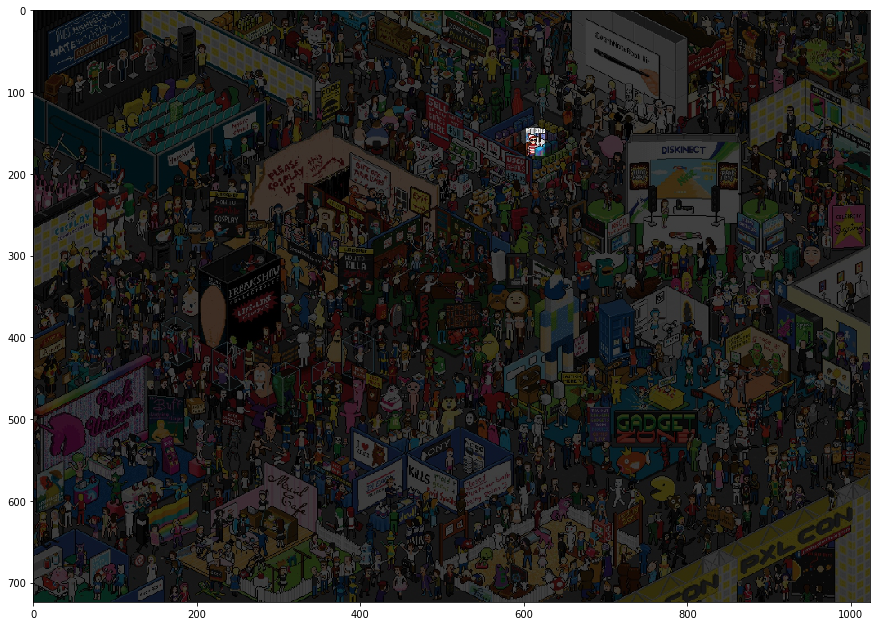

In [10]:
puzzle[topLeft[1]:botRight[1], topLeft[0]:botRight[0]] = roi
 
# display the images
cv2.imwrite("Puzzle_Result.jpg", puzzle)
result_rgb = cv2.cvtColor(puzzle,cv2.COLOR_RGB2BGR)
plt.figure(figsize=(15,15))
plt.imshow(result_rgb)

Hurray! We have found Waldo. Good job. 

### Now, here are a few questions for you: (20 points)

1) What is a "sliding window"? <br>
A. Sliding windows involve computing wavelet coeffecients and dividing them into components <br>
B. The process of moving a window across your screen. <br>
C. The process of sliding a pre-defined image across another image, from left-to-right and topto-bottom. <br>
D. Something to have in your house or apartment. <br>

2) Describe how Template Matching works. 

3) Would this method work if the template image Waldo was a different size? (Test and report the answer) You can use the cv2.resize() function to resize the template Image Waldo to twice its dimensions and see if this affects the answer.

4) Would this method work if the template image Waldo looked like Waldo_template.jpg? (Test and report the answer)


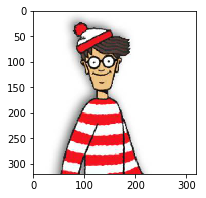

In [24]:
plt.figure(figsize = (3,3))
plt.imshow(cv2.cvtColor(cv2.imread('Waldo-Template.jpg'), cv2.COLOR_BGR2RGB))

5) Or this Waldo_books.jpg?

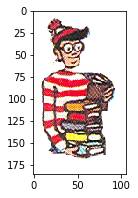

In [22]:
plt.figure(figsize = (3,3))
plt.imshow(cv2.cvtColor(cv2.imread('waldo_books.jpg'), cv2.COLOR_BGR2RGB))


6) How can you modify the above approach if the template image Waldo was cropped from the same puzzle but has a different dimension from the picture of Waldo hidden in the puzzle? We will be left with a false detection. Can you think of a brute force approach to correct this?

Ans: Loop over the input image at multiple scales (i.e. make the input image progressively smaller and smaller).
Apply template matching using cv2.matchTemplate  and keep track of the match with the largest correlation coefficient (along with the x, y-coordinates of the region with the largest correlation coefficient).
After looping over all scales, take the region with the largest correlation coefficient and use that as your “matched” region.

7) Formulate and implement a different approach through which you can create an automated “Waldo Detector” using image processing techniques. In each image, Waldo is hiding in the midst of a busy crowd. Waldo always wears the same red and white striped sweater and hat. You may implement any of the techniques discussed in class or in this assignment, or invent your own approach. For example, you might try template matching, examining color distributions, or looking for colored stripes or circles. You may assume that each input image contains only one valid Waldo.

### Bonus question - Fake Waldos! Oh no!

8) Unfortunately, there are several Waldo lookalikes in each scene. Try not to be fooled by these impostors! Here are some fake Waldos to look out for:

Can you suggest a method to conquer this problem? Here are some examples of pictures with Fake Waldos embedded in the puzzle making it harder to spot the real Waldo!



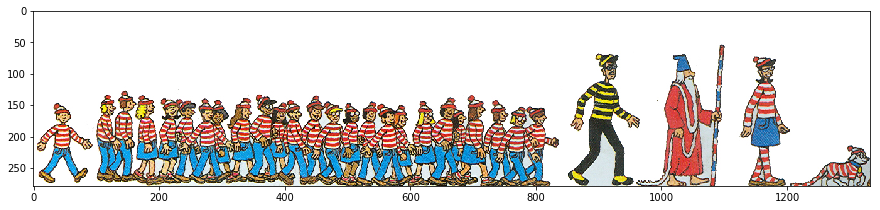

In [16]:
plt.figure(figsize = (15,15))
plt.imshow(cv2.cvtColor(cv2.imread('WaldoLookAlikes.jpg'), cv2.COLOR_BGR2RGB))

### The Man Who Mistook His Wife for a Hat (6 points)

When Oliver Sacks has his initial encounter with “the man who mistook his wife for a hat,” he explains
that Dr P. did not look at him in the normal way, but rather “made sudden strange fixations – on my
nose, on my right ear, down to my chin, up to my right eye – as if noting (even studying) these individual
features, but not seeing my whole face, its changing expressions, 'me' as a whole.”
Dr P. could experience the world only as small individual features. He was unable to group these lowlevel
features into high-level constructs. Sacks writes that he “had no sense whatever of a landscape or
a scene,” and when it came to recognizing people, “in the absence of obvious ‘markers,’ he was utterly
lost.” In many ways, Dr P. functioned like a computer, construing the world “by means of key features
and schematic relationships… without the reality being grasped at all.”
What tasks could Dr P. still accomplish by perceiving the world in this way? What tasks presented him
with the most difficulty? What does this suggest about the capabilities of computer vision?